Pandas

Using Pandas calculate costs of failed trainings in 2023 for such categories of specialists:

IT specialists

BI Specialists

Data specialists

Network Engineers

Software Engineers

Database Administrator (DBA)


In [1]:
import pandas as pd
import numpy as np

In [2]:
df_tr_dev = pd.read_csv('data/Employee Dataset/training_and_development_data.csv')

In [3]:
df_tr_dev.head()

,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1001,21-Sep-22,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,19-Jul-23,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1003,24-Feb-23,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
3,1004,12-Jan-23,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
4,1005,12-May-23,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99


In [4]:
df_tr_dev.columns

Index(['Employee ID', 'Training Date', 'Training Program Name',
       'Training Type', 'Training Outcome', 'Location', 'Trainer',
       'Training Duration(Days)', 'Training Cost'],
      dtype='object')

In [5]:
df_em_data = pd.read_csv('data/Employee Dataset/employee_data.csv')

In [6]:
df_em_data.head(3)

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4


In [7]:
df_em_data.columns

Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating'],
      dtype='object')

## merging 2 dfs and getting needed columns from it

In [8]:
df_merge = df_tr_dev.merge(right=df_em_data, left_on=['Employee ID'], right_on=['EmpID'], how='left')
df_merge = df_merge[['Training Date', 'Training Outcome', 'Title', 'Training Cost']] # after that step i dont need other columns

In [9]:
df_merge.head(2)

,Training Date,Training Outcome,Title,Training Cost
0,21-Sep-22,Failed,Software Engineer,510.83
1,19-Jul-23,Failed,Software Engineer,582.37


### filtering for 2023

In [10]:
# df_merge[df_merge['Training Date'].str.contains(r'23$')]  THIS OR 
df_merge = df_merge[pd.to_datetime(df_merge['Training Date'], format='%d-%b-%y').dt.year == 2023]

### filtering for failed

In [11]:
df_merge = df_merge[df_merge['Training Outcome'] == 'Failed']

### filtering for needed job titles

In [12]:
df_merge['Title'].unique()

array(['Software Engineer', 'Shared Services Manager',
       'Production Technician I', 'Production Technician II',
       'Production Manager', 'Sr. Accountant', 'Accountant I',
       'Sr. Network Engineer', 'Software Engineering Manager',
       'Senior BI Developer', 'Data Architect', 'BI Developer',
       'Area Sales Manager', 'Sales Manager', 'CIO', 'BI Director',
       'IT Manager - Infra', 'IT Support', 'IT Manager - Support',
       'Director of Sales', 'Network Engineer', 'Data Analyst',
       'Data Analyst ', 'President & CEO', 'Director of Operations',
       'IT Manager - DB', 'Administrative Assistant',
       'Enterprise Architect', 'Database Administrator'], dtype=object)

In [13]:
category_map = {
    'IT specialist': ['IT Support', 'IT Manager - Infra', 'IT Manager - Support', 'IT Manager - DB'],
    'BI Specialist': ['BI Developer', 'Senior BI Developer', 'BI Director'],
    'Data specialist': ['Data Analyst', 'Data Analyst ', 'Data Architect'], # one data analyst have space at end
    'Network Engineer': ['Network Engineer', 'Sr. Network Engineer'],
    'Software Engineer': ['Software Engineer', 'Software Engineering Manager'],
    'Database Administrator (DBA)': ['Database Administrator']
}

df_merge['Title'] = df_merge['Title'].replace(
    {title: category for category, titles in category_map.items() for title in titles}  # reverse mapping
)

In [14]:
valid_categories = [i for i in category_map.keys()]
df_merge = df_merge[df_merge['Title'].isin(valid_categories)] # clearing other titles (not valid_categories titles)
df_merge['Title'].unique()

array(['Software Engineer', 'Network Engineer', 'BI Specialist',
       'Data specialist', 'IT specialist', 'Database Administrator (DBA)'],
      dtype=object)

In [15]:
df_merge.head()

,Training Date,Training Outcome,Title,Training Cost
1,19-Jul-23,Failed,Software Engineer,582.37
5,08-May-23,Failed,Software Engineer,838.07
6,14-May-23,Failed,Software Engineer,667.32
11,28-Mar-23,Failed,Software Engineer,887.08
20,10-Mar-23,Failed,Software Engineer,647.16


### Group by Title

In [19]:
df = df_merge.groupby(['Title']).sum(numeric_only=True).sort_values(by='Training Cost')

In [20]:
df

,Training Cost
Title,
Database Administrator (DBA),3136.72
Data specialist,5564.65
BI Specialist,6126.70
Software Engineer,9332.22
Network Engineer,12423.01
IT specialist,12433.52


### Plotting

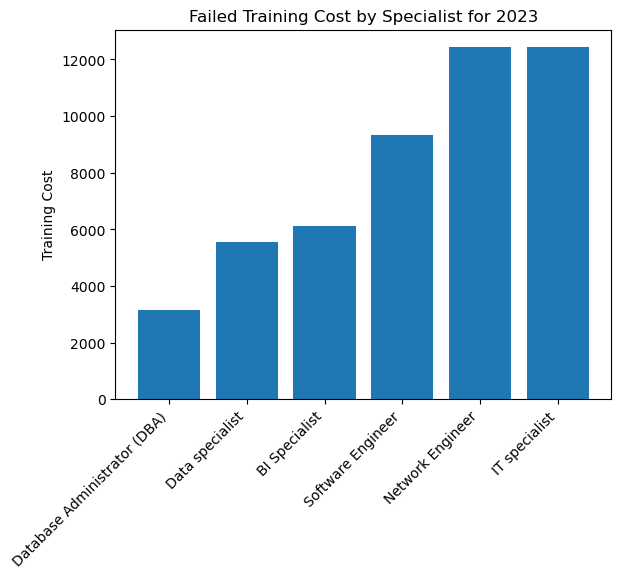

In [31]:
import matplotlib.pyplot as plt

plt.bar(df.index, df['Training Cost'])

plt.ylabel('Training Cost')
plt.title('Failed Training Cost by Specialist for 2023')

plt.xticks(rotation=45, ha='right')
plt.show()